#**Short Description** 

## Data Cleaning Practices

In this project, we will apply learned concepts from Day 1-2 lectures to perform data cleaning on a given Airbnb data set. 

This dataset (raw.csv) contains 30k+ records on hotels in the top-10 tourist destinations and major US metropolitan areas sraped from Airbnb.com. 
Each data record has 40 attributes including the number of bedrooms, price, location, etc. 
The attribute "pop2016" means population of the zipcode location (area) in year 2016.
Demographic and economic attributes were scraped from city-data.com. 

Updated: short description for attributes:

## House specific features, collected from Airbnb.com:
Bathrooms: The number of bathrooms in the listing
Bedrooms: The number of bedrooms
Beds: The number of bed(s)
LocationName: Location of the house
NumGuests: Maximum number of guests can hold
NumReviews: number of reviews received
Price: daily price in local currency
# Rating: Y/N - whether the rating of each house is 5 or not
latitude: location information latitude
longitude: location information longitude
zipcode: zipcode of the house

## demographic and economic attributes based on zipcode, collected from city-data.com (means the same zipcode should share the same value for each of the following attributes)
pop2016: popularity of the area reported in 2016
pop2010: popularity of the area reported in 2010
pop2000: popularity of the area reported in 2000
cost_living_index: a U.S standarded index for cost living measurement
land_area: space of land
water_area: space of water area
pop_density: density of population 
number of males: within the area population
number of females: within the area population
prop taxes paid 2016: Median real estate property taxes paid for housing units in 2016
median taxes: median of taxes paid by house owners in the area
median house value: median of house value in the area
median household income: median of income of house owners in the area
median monthly onwer costs (with mortgage): median monthly cost of house owner including mortgage
median monthly onwer costs (no mortgage): median monthly cost of house owner without considering mortgage
median gross rent: the monthly rent agreed or contracted for plus the estimated monthly cost of utilities and fuels.
median asking price for vacant for-sale home/condo: median asking price for for-sale home in the area
unemployment: umemployment ratio of the area

## aggregated features for Abnb by zipcode 
Number of Homes	Count of Abnb:	number of Abnb houses in this area
Density of Abnb (%): ratio of Abnb houses in this area
Average Abnb Price (by zipcode): aggregated by zipcode
Average NumReviews (by zipcode): aggregated by zipcode	
Average Rating (by zipcode): aggregated by zipcode
Average Number of Bathrooms (by zipcode): aggregated by zipcode
Average Number of Bedrooms (by zipcode): aggregated by zipcode
Average Number of Beds (by zipcode): aggregated by zipcode
Average Number of Guests (by zipcode): aggregated by zipcode



The prediction label is Rating of house.

## Submission: submit via onq. 


#**Import Libraries**

In [ ]:
# Step 1: Import needed libraries. E.g., pandas, missingno, and sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split


#**Read DataSet: Task One** 

Task 1: Read dataset and perform basic data exploration. Specially, you should write code to explore the types of data provided

In [ ]:
# TODO for Task 1, put your code here to perform data type and data scale check
df=pd.read_csv("/content/raw.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33145 entries, 0 to 33144
Data columns (total 40 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Bathrooms                                           32697 non-null  float64
 1   Bedrooms                                            29818 non-null  float64
 2   Beds                                                32831 non-null  float64
 3   LocationName                                        32826 non-null  object 
 4   NumGuests                                           32831 non-null  float64
 5   NumReviews                                          32829 non-null  float64
 6   Price                                               32507 non-null  float64
 7   Rating                                              33145 non-null  object 
 8   latitude                                            33145 non-null  float64


,Bathrooms,Bedrooms,Beds,LocationName,NumGuests,NumReviews,Price,Rating,latitude,longitude,...,Number of Homes,Count of Abnb,Density of Abnb (%),Average Abnb Price (by zipcode),Average NumReviews (by zipcode),Average Rating (by zipcode),Average Number of Bathrooms (by zipcode),Average Number of Bedrooms (by zipcode),Average Number of Beds (by zipcode),Average Number of Guests (by zipcode)
0,1.0,1.0,1.0,Atlanta,2.0,7.0,38.0,Y,33.75515,-84.32992,...,5306.0,75,1.413494,104.743243,35.280702,4.944444,1.459459,1.845070,2.146667,2.146667
1,1.0,1.0,1.0,Atlanta,2.0,15.0,38.0,N,33.82613,-84.33963,...,10537.2,96,0.911058,103.673684,21.169231,4.847458,1.281250,1.473118,1.687500,1.687500
2,2.0,2.0,2.0,Atlanta,4.0,17.0,100.0,Y,33.75076,-84.37058,...,9114.4,200,2.194330,119.368687,40.400000,4.937500,1.375000,1.602094,1.925000,1.925000
3,1.0,1.0,1.0,Atlanta,2.0,304.0,78.0,Y,33.77059,-84.33538,...,7808.0,130,1.664959,119.914729,44.063158,4.892857,1.292308,1.603306,1.953846,1.953846
4,1.0,1.0,1.0,Atlanta,2.0,19.0,50.0,Y,33.79030,-84.40027,...,9343.6,190,2.033477,131.058511,28.444444,4.881679,1.326316,1.580838,1.968421,1.968421


In [ ]:
df.describe()

,Bathrooms,Bedrooms,Beds,NumGuests,NumReviews,Price,latitude,longitude,zipcode,pop2016,...,Number of Homes,Count of Abnb,Density of Abnb (%),Average Abnb Price (by zipcode),Average NumReviews (by zipcode),Average Rating (by zipcode),Average Number of Bathrooms (by zipcode),Average Number of Bedrooms (by zipcode),Average Number of Beds (by zipcode),Average Number of Guests (by zipcode)
count,32697.000000,29818.000000,32831.000000,32831.000000,32829.000000,32507.000000,33145.000000,33145.000000,33145.000000,33103.000000,...,33103.000000,33145.000000,33103.000000,33145.000000,33145.000000,33145.000000,33145.000000,33145.000000,33145.000000,33145.000000
mean,1.215891,1.474479,1.940148,3.528373,51.086296,117.885071,36.700842,-97.464214,57754.753990,34018.967163,...,13607.586865,739.072077,36.405024,126.129854,49.056798,4.819490,1.236122,1.500675,1.952938,1.952938
std,0.547114,0.839045,1.421961,2.260288,62.151818,97.025832,5.198376,21.231474,36716.353574,22522.663845,...,9009.065538,1167.458959,96.259056,38.451543,16.486948,0.069848,0.131183,0.226741,0.356269,0.356269
min,0.000000,1.000000,0.000000,1.000000,2.000000,10.000000,25.452690,-122.544590,2108.000000,69.000000,...,27.600000,1.000000,0.003440,16.000000,4.000000,4.250000,0.344828,0.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000,11.000000,63.000000,32.749120,-122.259300,19147.000000,15504.000000,...,6201.600000,114.000000,0.805234,102.277778,38.602771,4.781250,1.178295,1.376812,1.732456,1.732456
50%,1.000000,1.000000,1.000000,3.000000,28.000000,90.000000,37.796110,-90.079520,70118.000000,33392.000000,...,13356.800000,284.000000,2.234994,117.697403,46.406699,4.835329,1.223011,1.461605,1.902098,1.902098
75%,1.000000,2.000000,2.000000,4.000000,67.000000,139.000000,40.647290,-75.181480,94112.000000,45420.000000,...,18168.000000,703.000000,5.538630,145.340708,57.070000,4.869565,1.317597,1.600000,2.145043,2.145043
max,9.000000,10.000000,20.000000,16.000000,1099.000000,999.000000,47.742760,-70.983350,98177.000000,114602.000000,...,45840.800000,4143.000000,330.488194,347.000000,206.000000,5.000000,3.043478,3.333333,6.000000,6.000000


#**Duplicated data: Task two**

Task 2: Data quality check, does duplicate entries exit in this table? Do they have consistent values? Briefely explain your methodology and your findings within this markdown cell, and write corresponding code in the next code cell.


In [ ]:
# TODO for Task 2
print("check if we have null or not: ",df.duplicated().any())
print("total number of duplicated rows are: ",df.duplicated().sum())
df[df.duplicated()] #print the duplicated rows in our data 

check if we have null or not:  True
total number of duplicated rows are:  4254


,Bathrooms,Bedrooms,Beds,LocationName,NumGuests,NumReviews,Price,Rating,latitude,longitude,...,Number of Homes,Count of Abnb,Density of Abnb (%),Average Abnb Price (by zipcode),Average NumReviews (by zipcode),Average Rating (by zipcode),Average Number of Bathrooms (by zipcode),Average Number of Bedrooms (by zipcode),Average Number of Beds (by zipcode),Average Number of Guests (by zipcode)
4815,1.0,1.0,1.0,New Orleans,2.0,89.0,120.0,Y,29.96457,-90.05337,...,4704.4,703,14.943457,94.171920,83.967239,4.823668,1.211127,1.524242,2.066856,2.066856
4818,1.0,NaN,1.0,New Orleans,2.0,39.0,70.0,N,29.95745,-90.06990,...,1115.2,562,50.394548,91.775986,42.848077,4.769981,1.227758,1.337838,1.989324,1.989324
4820,2.0,2.0,3.0,New Orleans,8.0,81.0,60.0,N,29.95404,-90.07364,...,1115.2,562,50.394548,91.775986,42.848077,4.769981,1.227758,1.337838,1.989324,1.989324
4821,1.0,NaN,1.0,New Orleans,2.0,56.0,95.0,Y,29.97018,-90.09818,...,14967.6,829,5.538630,109.845499,49.687906,4.878179,1.249698,1.848285,2.343788,2.343788
4822,2.0,2.0,4.0,New Orleans,8.0,4.0,100.0,N,29.95312,-90.07124,...,1115.2,562,50.394548,91.775986,42.848077,4.769981,1.227758,1.337838,1.989324,1.989324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33129,1.0,2.0,2.0,Washington,6.0,17.0,60.0,N,38.87294,-76.97248,...,22297.2,227,1.018065,145.340708,27.687500,4.650000,1.367257,1.681818,2.756637,2.756637
33130,1.0,1.0,1.0,Arlington,4.0,46.0,89.0,Y,38.89807,-77.08786,...,10717.2,1265,11.803456,168.866129,31.233509,4.787722,1.254358,1.434460,1.716996,1.716996
33131,1.0,1.0,1.0,Washington,3.0,32.0,89.0,Y,38.88014,-76.98379,...,11794.8,410,3.476108,127.748768,54.344444,4.900289,1.196078,1.442708,2.487805,2.487805
33137,1.0,3.0,4.0,Arlington,6.0,18.0,130.0,Y,38.89802,-77.10512,...,10717.2,1265,11.803456,168.866129,31.233509,4.787722,1.254358,1.434460,1.716996,1.716996


#**Missing Values: Task Three**

Task 3: Data quality check, write code and answer:
3.1 does missing value exit in the table? 
3.2 Where are the missing data? 
3.3 How much data is missing?
3.4 Are there any variables often missing together？

You can use missingno library to generate plots to support your claim. 
Summarize your findings for task 3 in this markdown cell and write corresponding code in the next code cell.

In [ ]:
# TODO for Task 3
print("does missing value exit in the table: " , df.isnull().sum().any())
total_null = df.isnull().sum() #to check sum null values for each column 
# sort attributes by missing value ratio
missing_data = pd.DataFrame({'Total missing':total_null})
missing_data.sort_values(by='Total missing',ascending=False)

does missing value exit in the table:  True


,Total missing
median taxes (with mortgage,3621
median taxes (no mortgage),3527
median monthly owner costs (no mortgage),3494
median monthly owner costs (with mortgage),3361
median house value,3333
Bedrooms,3327
Price,638
Bathrooms,448
LocationName,319
NumReviews,316


**Barplot**

The barplot provides a simple plot where each bar represents a column within the dataframe. The height of the bar indicates how complete that column is, i.e, how many non-null values are present

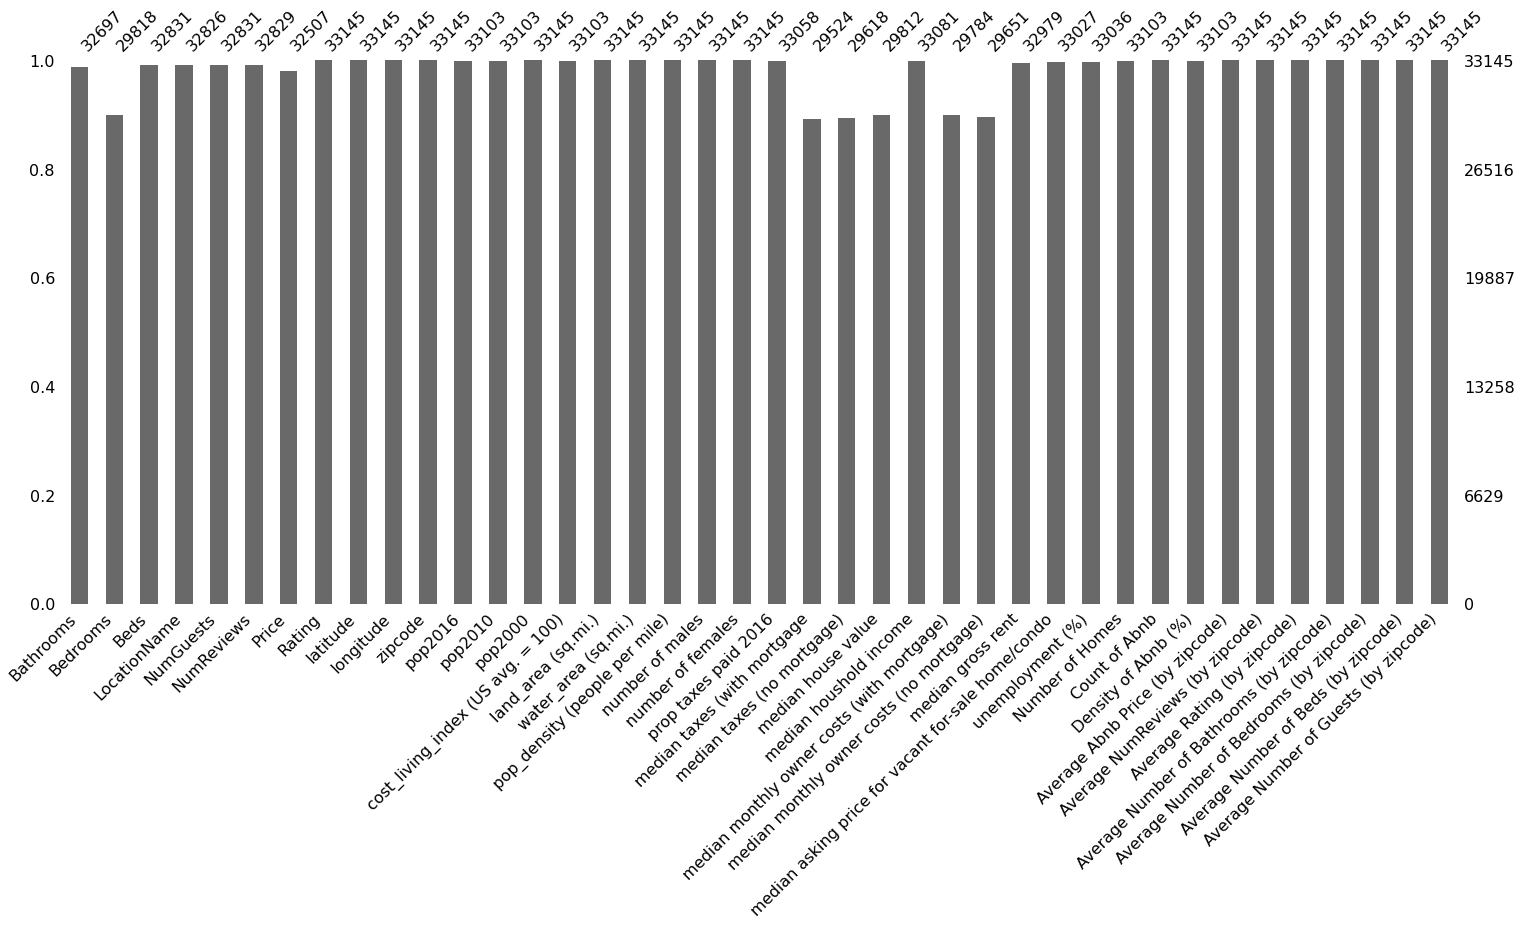

In [ ]:
#bar chart
msno.bar(df);

On the left side of the plot, the y-axis scale ranges from 0.0 to 1.0, where 1.0 represents 100% data completeness. If the bar is less than this, it indicates that we have missing values within that column.

On the right side of the plot, the scale is measured in index values. With the top right representing the maximum number of rows within the dataframe.

Along the top of the plot, there are a series of numbers that represent the total count of the non-null values within that column


we can see that a number of the columns (bedroooms, median taxes (no mortgage) and median house values ,median taxes (with mortgage) have a large amount of missing values. Other columns (e.g. longitude, water_area (sq.mi.) and latitude) are complete and have the maximum number of values.

**from last image we found that a lot of data have missing values and we can check which mechanism will use to handle missing data** 

**Matrix Plot**

The matrix plot is a great tool if you are working with depth-related data or time-series data. It provides a colour fill for each column. When data is present, the plot is shaded in grey (or your colour of choice), and when it is absent the plot is displayed in white.

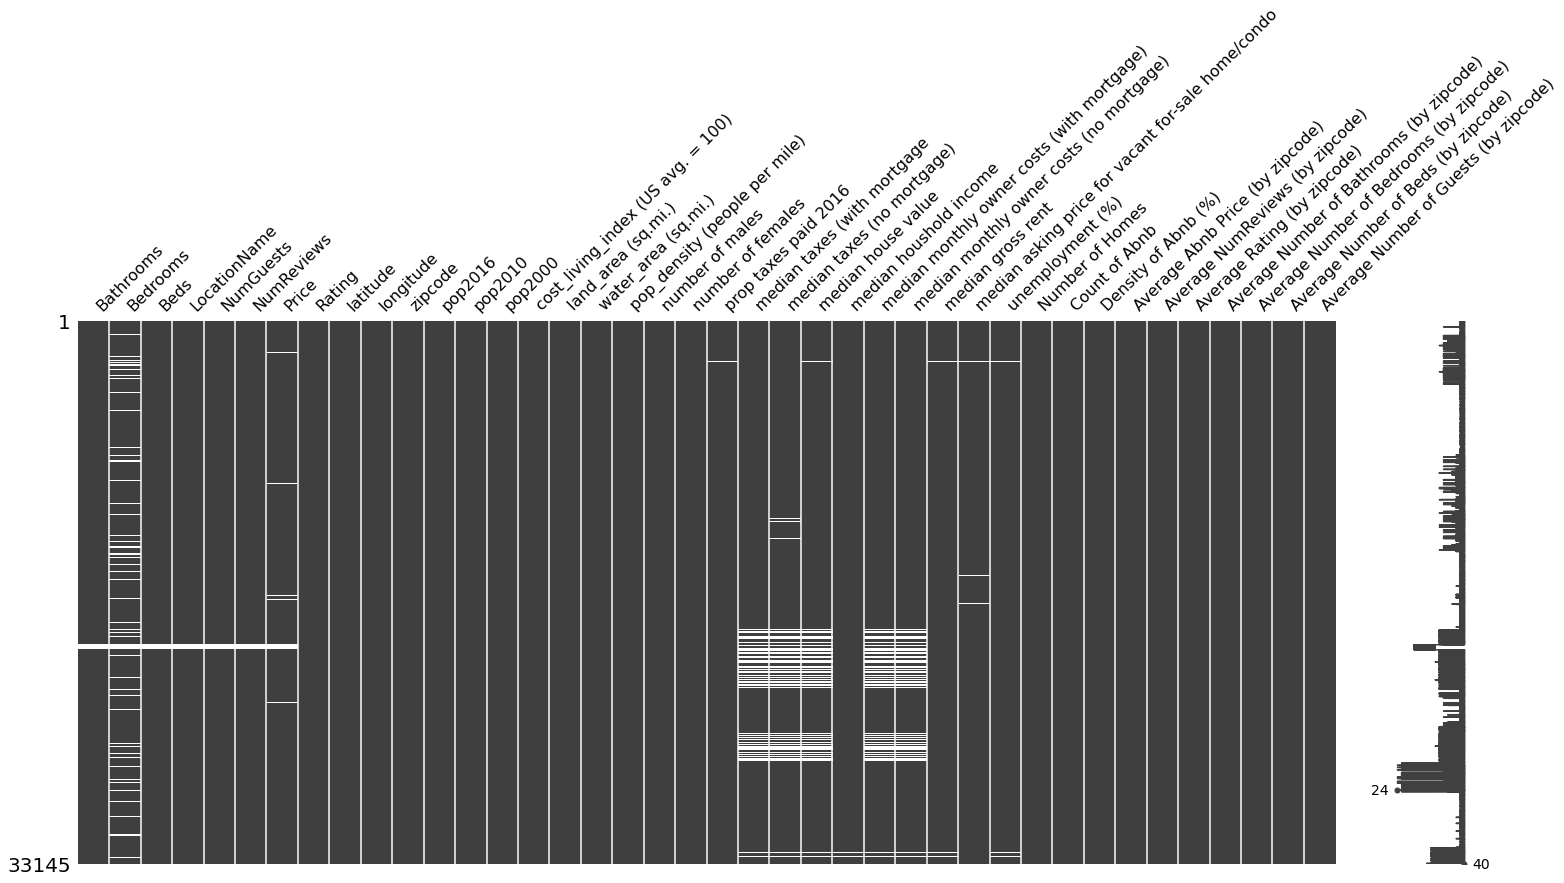

In [ ]:
#visualize missing values as a matrix
msno.matrix(df)
print('\n')

**Heatmap**

The heatmap is used to identify correlations of the nullity between each of the different columns. In other words, it can be used to identify if there is a relationship in the presence of null values between each of the columns.

Values close to positive 1 indicate that the presence of null values in one column is correlated with the presence of null values in another column.

Values close to negative 1 indicate that the presence of null values in one column is anti-correlated with the presence of null values in another column. In other words, when null values are present in one column, there are data values present in the other column, and vice versa.

Values close to 0, indicate there is little to no relationship between the presence of null values in one column compared to another.

There are a number of values that show as <-1. This indicates that the correlation is very close to being 100% negative.

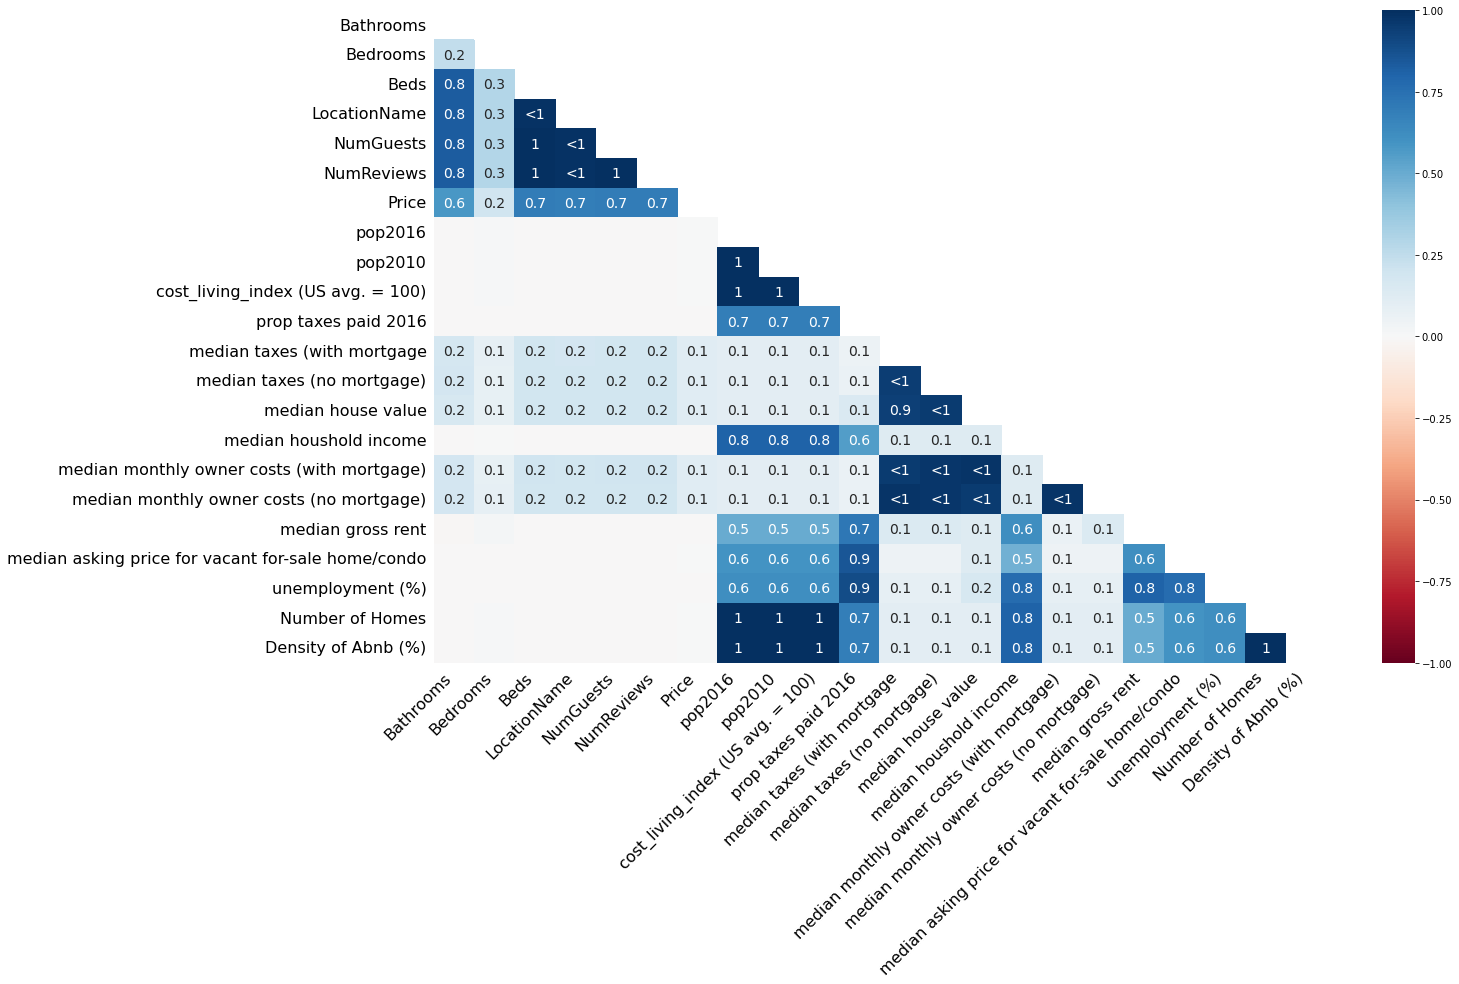

In [ ]:
msno.heatmap(df);

Findings: 

1) from the matrix image there are  clear association between the some columns  in their pattern of missing values. 

2) No any record missing all variables.

3) Bathroom, Beds, LocationName, NumGuests, Num Reviews     columns could be MAR mechanism. and in other missing values in columns could be MCAR mechanism.



#**Potential Mechnisms Task Four**

Task 4: What are the potential mechnisms of the missing values? Briefely explain your methodology and your findings (within this markdown cell), and write corresponding code in the next code cell.

**Missing completely at random**

Missing completely at random (MCAR) is defined as when the probability that the data are missing is not related to either the specific value which is supposed to be obtained or the set of observed responses. MCAR is an ideal but unreasonable assumption for many studies performed in the field of anesthesiology. However, if data are missing by design, because of an equipment failure or because the samples are lost in transit or technically unsatisfactory, such data are regarded as being MCAR.

The statistical advantage of data that are MCAR is that the analysis remains unbiased. Power may be lost in the design, but the estimated parameters are not biased by the absence of the data.

**Missing at random**

Missing at random (MAR) is a more realistic assumption for the studies performed in the anesthetic field. Data are regarded to be MAR when the probability that the responses are missing depends on the set of observed responses, but is not related to the specific missing values which is expected to be obtained.

As we tend to consider randomness as not producing bias, we may think that MAR does not present a problem. However, MAR does not mean that the missing data can be ignored. If a dropout variable is MAR, we may expect that the probability of a dropout of the variable in each case is conditionally independent of the variable, which is obtained currently and expected to be obtained in the future, given the history of the obtained variable prior to that case.

**Missing not at random**

If the characters of the data do not meet those of MCAR or MAR, then they fall into the category of missing not at random (MNAR).

The cases of MNAR data are problematic. The only way to obtain an unbiased estimate of the parameters in such a case is to model the missing data. The model may then be incorporated into a more complex one for estimating the missing values.

 **findings:** in our problem and after check our data by using missingno library we found that two mechanisms that they are MAR and MNAR so we will use our techniques based on the mechanism 

#**Handling Missing Values: Task five** 

Task 5: Handling missing values, Briefely explain your methodology below (within this markdown cell), and write corresponding code in the next code cell.

**Handling Missing values for categorical cols** 

In [ ]:
# TODO for Task 5
#list of variables that are  missing values for categorical attributes 
# null_col_cat= ['LocationName','Rating']
imp_mode_null = SimpleImputer(strategy='most_frequent')
df['LocationName']= imp_mode_null.fit_transform(df[['LocationName']])
df['Rating']= imp_mode_null.fit_transform(df[['Rating']])

In [ ]:
#check if have null values after apply SimpleImputer 
print('✔ Number of missing values for LocationName after apply SimpleImputer: ',df['LocationName'].isnull().sum())
print('✔ Number of missing values for    Rating    after apply SimpleImputer: ',df['Rating'].isnull().sum())


✔ Number of missing values for LocationName after apply SimpleImputer:  0
✔ Number of missing values for    Rating    after apply SimpleImputer:  0


**Handling Missing values for numerical cols**

In [ ]:
# TODO for Task 5
#list of variables that are  missing values for numerical attributes 
null_col_num= ['Bedrooms','median monthly owner costs (with mortgage)','median monthly owner costs (no mortgage)',
                  'median taxes (with mortgage','median taxes (no mortgage)',
                  'median house value','Price','Bathrooms','NumReviews','Beds','NumGuests','median gross rent',
                  'median asking price for vacant for-sale home/condo','unemployment (%)','prop taxes paid 2016',
                  'median houshold income','Number of Homes','cost_living_index (US avg. = 100)','pop2010','pop2016',
                  'Density of Abnb (%)']

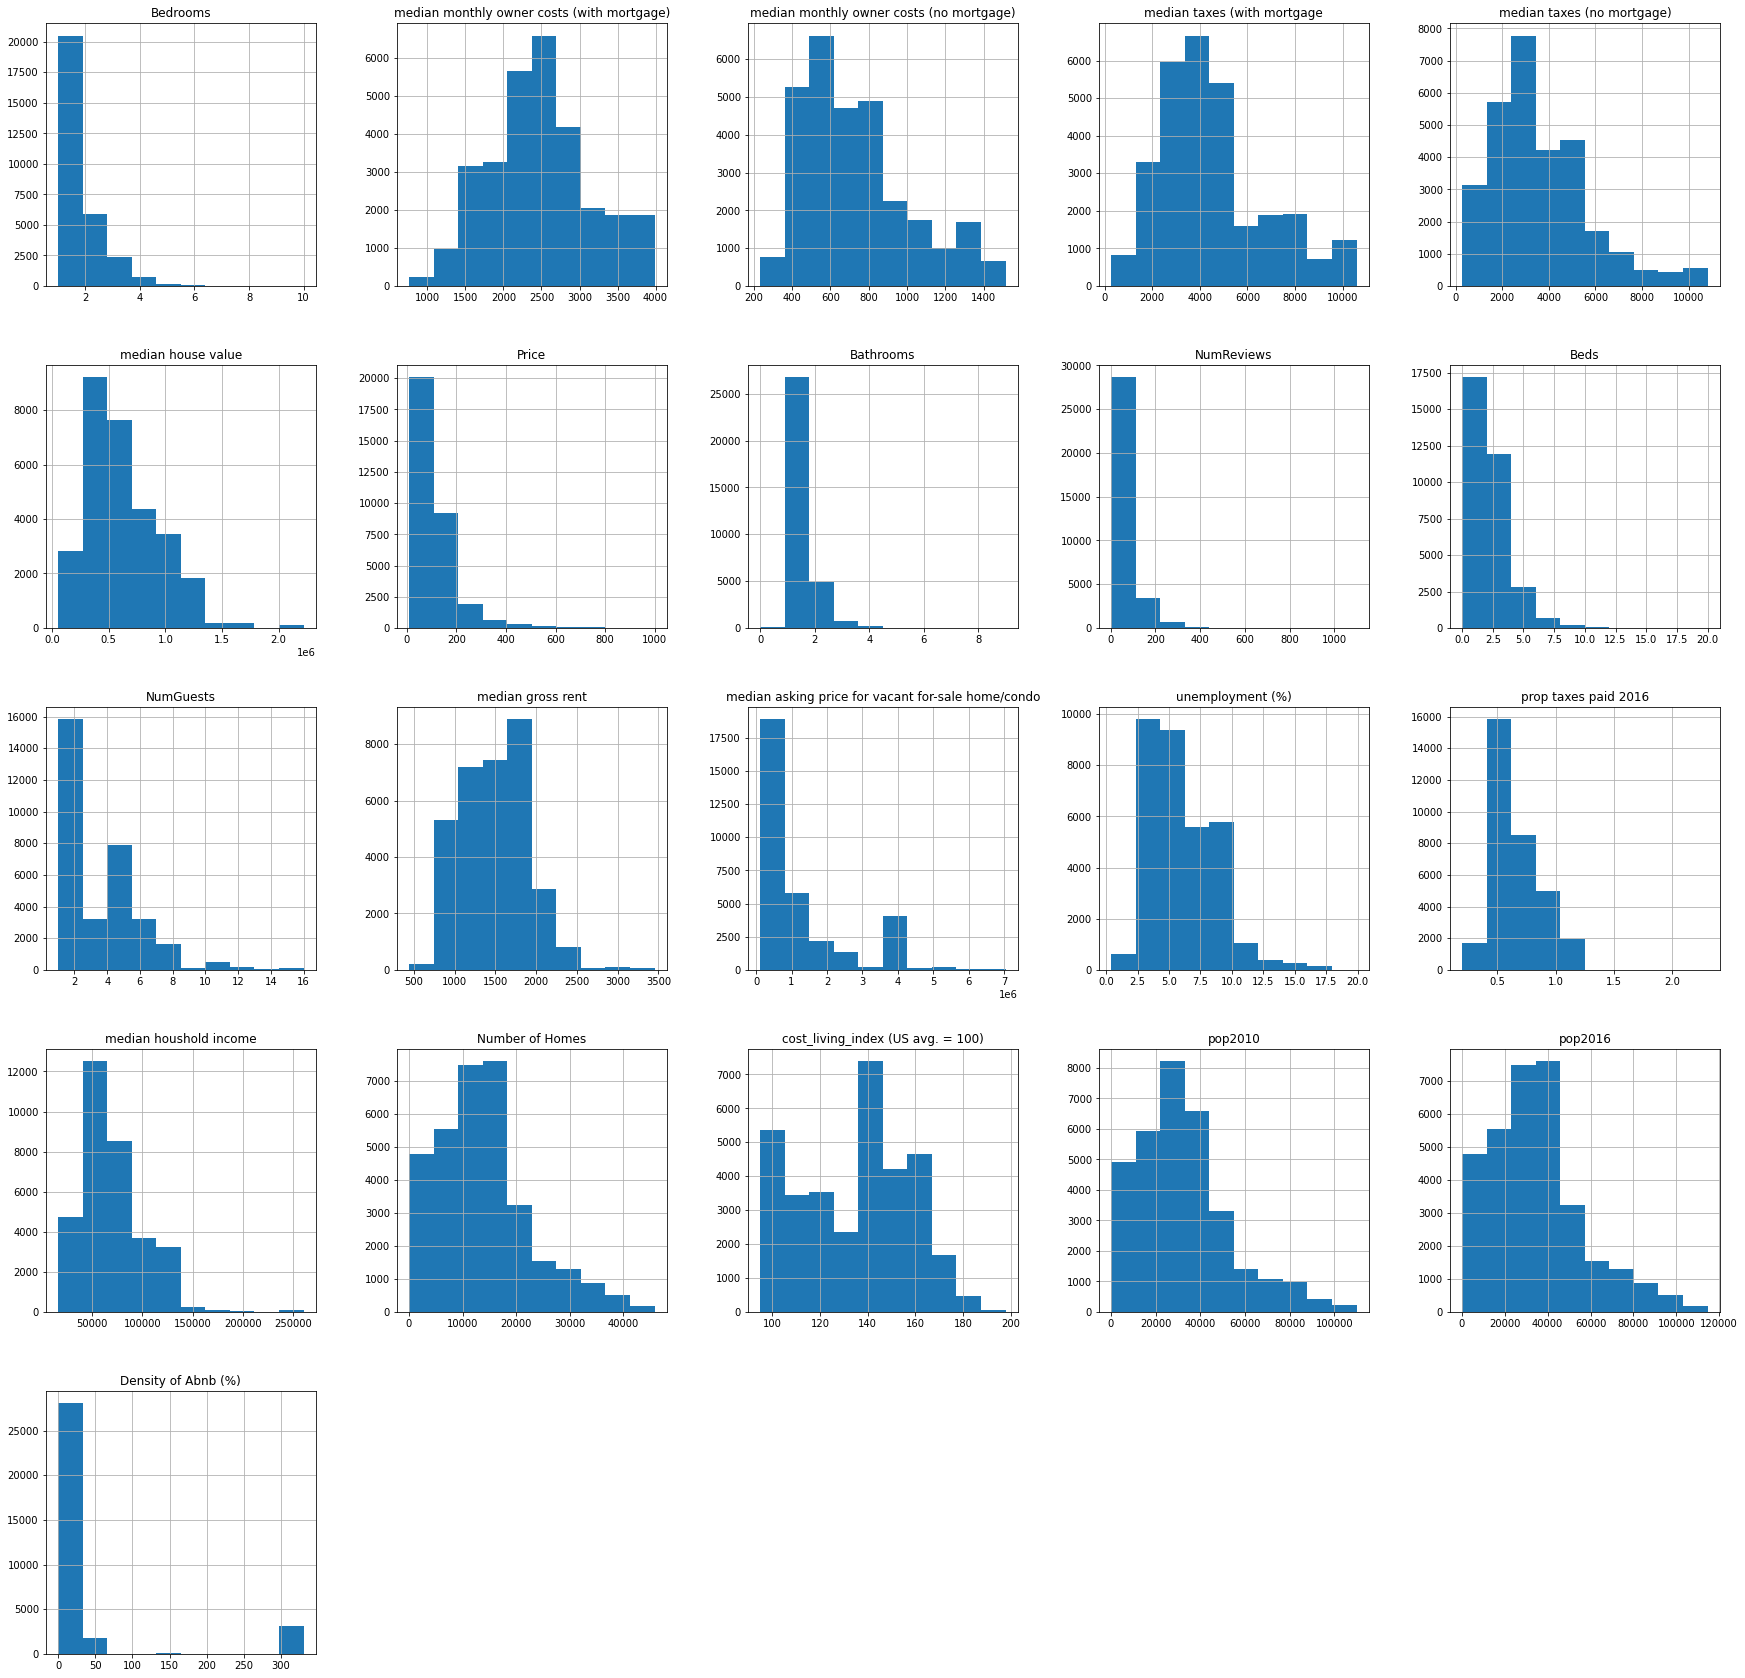

In [ ]:
#print histogram for each columns have missing values 
df.hist(column =null_col_num,figsize=(30,30));

We see that:

- **Cols:** ['median monthly owner costs (with mortgage)','median monthly owner costs (no mortgage)'] 

     *have normal distribution so we will fill missing values in them with mean method.*


- **Cols:** ['Bedrooms','median taxes (with mortgage','median taxes (no mortgage)','median house value','Price','Bathrooms','NumReviews','Beds','NumGuests','median gross rent','median asking price for vacant for-sale home/condo','unemployment (%)','prop taxes paid 2016','median houshold income','Number of Homes','cost_living_index (US avg. = 100)','pop2010','pop2016'] 
  
  have skewed distribution so we will fill missing values in them with median method.
- **Cols:** ['Density of Abnb (%)'] 
      
   has skewed distribution & approximitly only 2 values so we will fill missing values in it with mode method.



In [ ]:
imp_mean = SimpleImputer(strategy='mean')
imp_median = SimpleImputer(strategy='median')
imp_mode = SimpleImputer(strategy='most_frequent')
#this is list from numberical variable 
mean_list= ['median monthly owner costs (with mortgage)','median monthly owner costs (no mortgage)'] 
median_list= ['Bedrooms','median taxes (with mortgage','median taxes (no mortgage)','median house value',
              'Price','Bathrooms','NumReviews','Beds','NumGuests','median gross rent',
              'median asking price for vacant for-sale home/condo','unemployment (%)',
              'prop taxes paid 2016','median houshold income','Number of Homes',
              'cost_living_index (US avg. = 100)','pop2010','pop2016'] 
mode_list= ['Density of Abnb (%)'] 

for col in mean_list:
  df[col]= imp_mean.fit_transform(df[[col]])

for col in median_list:
  df[col]= imp_median.fit_transform(df[[col]])

for col in mode_list:
  df[col]= imp_mode.fit_transform(df[[col]])

In [ ]:
print('✔ Number of missing values after apply SimpleImputer:\n \n',df.isnull().sum())

✔ Number of missing values after apply SimpleImputer:
 
 Bathrooms                                             0
Bedrooms                                              0
Beds                                                  0
LocationName                                          0
NumGuests                                             0
NumReviews                                            0
Price                                                 0
Rating                                                0
latitude                                              0
longitude                                             0
zipcode                                               0
pop2016                                               0
pop2010                                               0
pop2000                                               0
cost_living_index (US avg. = 100)                     0
land_area (sq.mi.)                                    0
water_area (sq.mi.)                            

#**Build model: Task six**

Task 6: Impact on classification performance. Consider one of the above handling method you proposed for this dataset and perform classification tast to investigate if your handling method can improve classificaiton performance. 

Train-test split: you can do one split of train and test where 70% of the data for training and the remaining 30% for testing. 
Classifier: you can pick any two tranditional binary classifier (e.g., from sklearn)

**apply LabelEncoder on categorical columns**

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['LocationName']= encoder.fit_transform(df['LocationName'])
df['Rating']= encoder.fit_transform(df['Rating'])

In [ ]:
pd.get_dummies(df, columns = ['LocationName'])


,Bathrooms,Bedrooms,Beds,NumGuests,NumReviews,Price,Rating,latitude,longitude,zipcode,...,LocationName_266,LocationName_267,LocationName_268,LocationName_269,LocationName_270,LocationName_271,LocationName_272,LocationName_273,LocationName_274,LocationName_275
0,1.0,1.0,1.0,2.0,7.0,38.0,1,33.75515,-84.32992,30317,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1.0,1.0,2.0,15.0,38.0,0,33.82613,-84.33963,30324,...,0,0,0,0,0,0,0,0,0,0
2,2.0,2.0,2.0,4.0,17.0,100.0,1,33.75076,-84.37058,30312,...,0,0,0,0,0,0,0,0,0,0
3,1.0,1.0,1.0,2.0,304.0,78.0,1,33.77059,-84.33538,30307,...,0,0,0,0,0,0,0,0,0,0
4,1.0,1.0,1.0,2.0,19.0,50.0,1,33.79030,-84.40027,30309,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33140,1.0,1.0,2.0,5.0,159.0,67.0,0,38.90956,-77.03107,20005,...,0,0,0,0,0,0,0,0,0,0
33141,2.0,1.0,4.0,1.0,28.0,49.0,1,38.90920,-77.02622,20005,...,0,0,0,0,0,0,0,0,0,0
33142,1.0,1.0,1.0,2.0,106.0,120.0,1,38.88746,-76.99119,20003,...,0,0,0,0,0,0,0,0,0,0
33143,1.0,1.0,2.0,3.0,296.0,70.0,1,38.88535,-76.98183,20003,...,0,0,0,0,0,0,0,0,0,0


**Split data**

In [ ]:
#split our data to features & label
X = df.drop('Rating',axis=1)
y = df['Rating']

**Data Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled= scaler.fit_transform(X)

**Data Split** 

one split of train and test where 70% of the data for training and the remaining 30% for testing.

In [ ]:
# TODO for Task 6
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=5 , shuffle=True)

**SVM model** 

In [ ]:
from sklearn import svm 
SVM = svm.SVC().fit(X_train, y_train)

In [ ]:
#predict train labels
SVM_train_pred= SVM.predict(X_train)
#predict test labels
SVM_test_pred= SVM.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

Train_acc= accuracy_score(y_train,SVM_train_pred)
Test_acc= accuracy_score(y_test,SVM_test_pred)

print('Train_accuracy: ',Train_acc)
print('Test_accuracy: ',Test_acc)

Train_accuracy:  0.6775570018533684
Test_accuracy:  0.6754827031375704


**XGboost model**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(random_state = 10)
GBC.fit(X_train, y_train)
y_pred_GBC=GBC.predict(X_test)
y_pred_GBC

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
# #Calculating classification Report :  
from sklearn.metrics import confusion_matrix, classification_report
ClassificationReport = classification_report(y_test, y_pred_GBC )
print('Classification Report is : \n', ClassificationReport)

Classification Report is : 
               precision    recall  f1-score   support

           0       0.64      0.20      0.31      3227
           1       0.71      0.95      0.81      6717

    accuracy                           0.70      9944
   macro avg       0.68      0.57      0.56      9944
weighted avg       0.69      0.70      0.65      9944



In [ ]:
# Importing models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

#  Metrics
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import f1_score
# Cross validation
from sklearn.model_selection import cross_val_score


classifing_model = [DecisionTreeClassifier(random_state=10 , max_depth=6),
             RandomForestClassifier(n_estimators =100, random_state=10   ),
             GradientBoostingClassifier(random_state = 10),
             SVC(gamma='auto' ,C=10 , tol=0.01 , degree=3),GaussianNB()]

df = pd.DataFrame(columns = ['Name', 'Train Score', 'Test Score',  
                             'Cross Validation Score (Mean Accuracy)'])

for classify in classifing_model:
    classify.fit(X_train, y_train)
    y_pred = classify.predict(X_test)
    
    # print classifier name
    s = str(type(classify)).split('.')[-1][:-2]
    
    # Train Score
    train = classify.score(X_train, y_train)
    
    # Test Score
    test = classify.score(X_test, y_test)
    
    # MAE score
    f1score = f1_score(y_test, y_pred,average = 'micro')
    

    # accur Score
    accur = accuracy_score(y_test, y_pred)
    
    accuracy = cross_val_score(estimator = classify, X = X_train, y = y_train, cv=10)
    cv = accuracy.mean()*100
    
    
    df = df.append({'Name': s, 'Train Score': train, 'Test Score': test, 'f1_score': f1score, 
                    'accuracy_score': accur, 'Cross Validation Score (Mean Accuracy)': cv },
                  ignore_index=True)
    ClassificationReport = classification_report(y_test , y_pred)
    print('Classification Report for ',classify ,' is  : \n', ClassificationReport) 
df.head()

Classification Report for  DecisionTreeClassifier(max_depth=6, random_state=10)  is  : 
               precision    recall  f1-score   support

           0       0.55      0.23      0.33      3227
           1       0.71      0.91      0.80      6717

    accuracy                           0.69      9944
   macro avg       0.63      0.57      0.56      9944
weighted avg       0.66      0.69      0.65      9944

Classification Report for  RandomForestClassifier(random_state=10)  is  : 
               precision    recall  f1-score   support

           0       0.66      0.48      0.55      3227
           1       0.78      0.88      0.83      6717

    accuracy                           0.75      9944
   macro avg       0.72      0.68      0.69      9944
weighted avg       0.74      0.75      0.74      9944

Classification Report for  GradientBoostingClassifier(random_state=10)  is  : 
               precision    recall  f1-score   support

           0       0.64      0.20      0.31   

,Name,Train Score,Test Score,Cross Validation Score (Mean Accuracy),accuracy_score,f1_score
0,DecisionTreeClassifier,0.705099,0.689763,68.561691,0.689763,0.689763
1,RandomForestClassifier,1.000000,0.750402,74.582931,0.750402,0.750402
2,GradientBoostingClassifier,0.714840,0.704948,70.199526,0.704948,0.704948
3,SVC,0.982501,0.704747,69.841808,0.704747,0.704747
4,GaussianNB,0.646998,0.654063,64.721324,0.654063,0.654063


#**Report Findings: Task seven**

Task 7: Report your findings through the above experiments (in this markdown cell)

first we load data and we make some explorations to check the types of the data and after this we check the duplicated data and check the missing values by using a lot of methods but best one when we used missingno library it has and view the type of mechanism that will follow it to handle missing values and after we determine it we made fill for the missing values as i showed before and after this step i prepared our data to fit the model 